# CHALLENGE 1 : US POLICE SHOOTING

## CONTEXT AND DATA DESCRIPTION

### CONTEXT

As student in Data Science at IMT Atlantique, we have the opportunity to participate to a subject related to the Fundamentals of Machine Learning. After one week of classes, we learned about some unsupervised learning methods (PCA,K-means). In this context, to ensure our comprehension of these methods, we have to develop a project by using the knowledge acquired and doing some research.

The project we decided to work on is based on the Kaggle US Police Shooting. A Dataset describing the features of the individuals shooted by the US Police from 2015 to mid Jun 2020.

In the following Notebook, we'll present the analysis we did on this Dataset and the conclusions we end up with.

## Description of the Dataset's features
#### Our Dataset is composed of 15 features which are :

- Id : Unique Id of the victim

- Name : Victim's First name and Last Name

- Date : Victim's date of death in YYYY-MM-DD format

- manner_of_death : Categorical variable ('shot' and 'shot and Tasered')

- Armed : it indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm, but in some case of uncertainty, we have :
    * unknown: the victim was armed, but it is not known what the object was
    * unarmed: the victim was not armed


- age = Victim's age

- Gender : 'M' means men and 'F' means Female

- Race : Victim's race (Other means an undetrermined or unknwon race)

- city and state of the shooting (States are represented by the two-letter postal code abbreviation )

- signs_of_mental_illness : Victim's mental health state (Boolean feature : Yes or No)

- threat_level : Whether the victim threated the police men or not ('attack', 'other', 'undetermined')

- flee 	('Not fleeing', 'Car', 'Foot', 'Other') : The threat column and the fleeing column are not necessarily related. For example, there is an incident in which the suspect is fleeing and at the same time turns to fire at gun at the officer. Also, attacks represent a status immediately before fatal shots by police while fleeing could begin slightly earlier and involve a chase.

- body_camera (False, True) : Whether the police officer had a body camera turned on or not

- arms_category ('Guns', 'Unarmed', 'Other unusual objects', 'Piercing objects','Sharp objects', 'Unknown', 'Blunt instruments', 'Multiple','Electrical devices', 'Hand tools', 'Vehicles', 'Explosives') : if the victim was armed, this feature shows the arms's category of the victim


## EXPLORATORY DATA ANALYSIS

In [ ]:
#Install Package for clustering
!pip install Kmodes
# We import the Librairies we'll use during along the project
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import geopandas
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
import plotly as pt
import math

###VISUALIZE DATA ON MAP OF THE UNITED STATES

We need some data for geometry of US before this step. Please visit this site : https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

And download

cb_2018_us_state_20m.zip [<1.0 MB]

Visit https://developers.google.com/public-data/docs/canonical/states_csv
to download the location of each states


In [ ]:
data = pd.read_csv('shootings.csv')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [ ]:
# Create a dictionary to map abbreviations to full state names
abbrev_to_name = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
} #link to this list

# Add a new column with full state names based on the abbreviations
state_freq = data['state'].map(abbrev_to_name).value_counts()

shooting_cases = state_freq.values
state_name = state_freq.index
# Create the pandas DataFrame with column name is provided explicitly
case_df = pd.DataFrame(state_name, columns=['NAME'])
case_df['shooting_cases'] = shooting_cases



California    701
Texas         426
Florida       324
Arizona       222
Colorado      168
Name: state, dtype: int64

In [ ]:
# initialize list elements
shooting_cases = state_freq.values
state_name = state_freq.index
# Create the pandas DataFrame with column name is provided explicitly
case_df = pd.DataFrame(state_name, columns=['NAME'])
case_df['shooting_cases'] = shooting_cases
case_df.head()

,NAME,shooting_cases
0,California,701
1,Texas,426
2,Florida,324
3,Arizona,222
4,Colorado,168


In [ ]:
# List of state names
state_names = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
    'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
    'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

# Create a DataFrame with the state names
state_df = pd.DataFrame({'NAME': state_names})


In [ ]:
# Merge shooting_states_df with state_df
merged_df = state_df.merge(case_df, on='NAME', how='left')

# Fill NaN values with 0
merged_df['shooting_cases'].fillna(0, inplace=True)

In [ ]:
# Load the data for states' latitude and longitude
usa_location=pd.read_csv('states.csv')
usa_location=usa_location.rename({'name': 'NAME'}, axis='columns')
usa_location.head()


,NAME,state,latitude,longitude
0,Alabama,AL,32.318230,-86.902298
1,Alaska,AK,66.160507,-153.369141
2,Arizona,AZ,34.048927,-111.093735
3,Arkansas,AR,34.799999,-92.199997
4,California,CA,36.778259,-119.417931


In [ ]:
# merge two dataframes
usa_map_df=merged_df.merge(usa_location, on = 'NAME', how = 'left')
usa_map_df=usa_map_df[usa_map_df.NAME!='Hawaii']
usa_map_df=usa_map_df[usa_map_df.NAME!='Alaska']

In [ ]:
# Load cb_2018_us_state_20m shapefile
# b_2018_us_state_20m file source :https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
geo_usa = geopandas.read_file('cb_2018_us_state_20m.shp')
# merge usa data and shapefile
geo_merge=geo_usa.merge(usa_map_df,on='NAME')

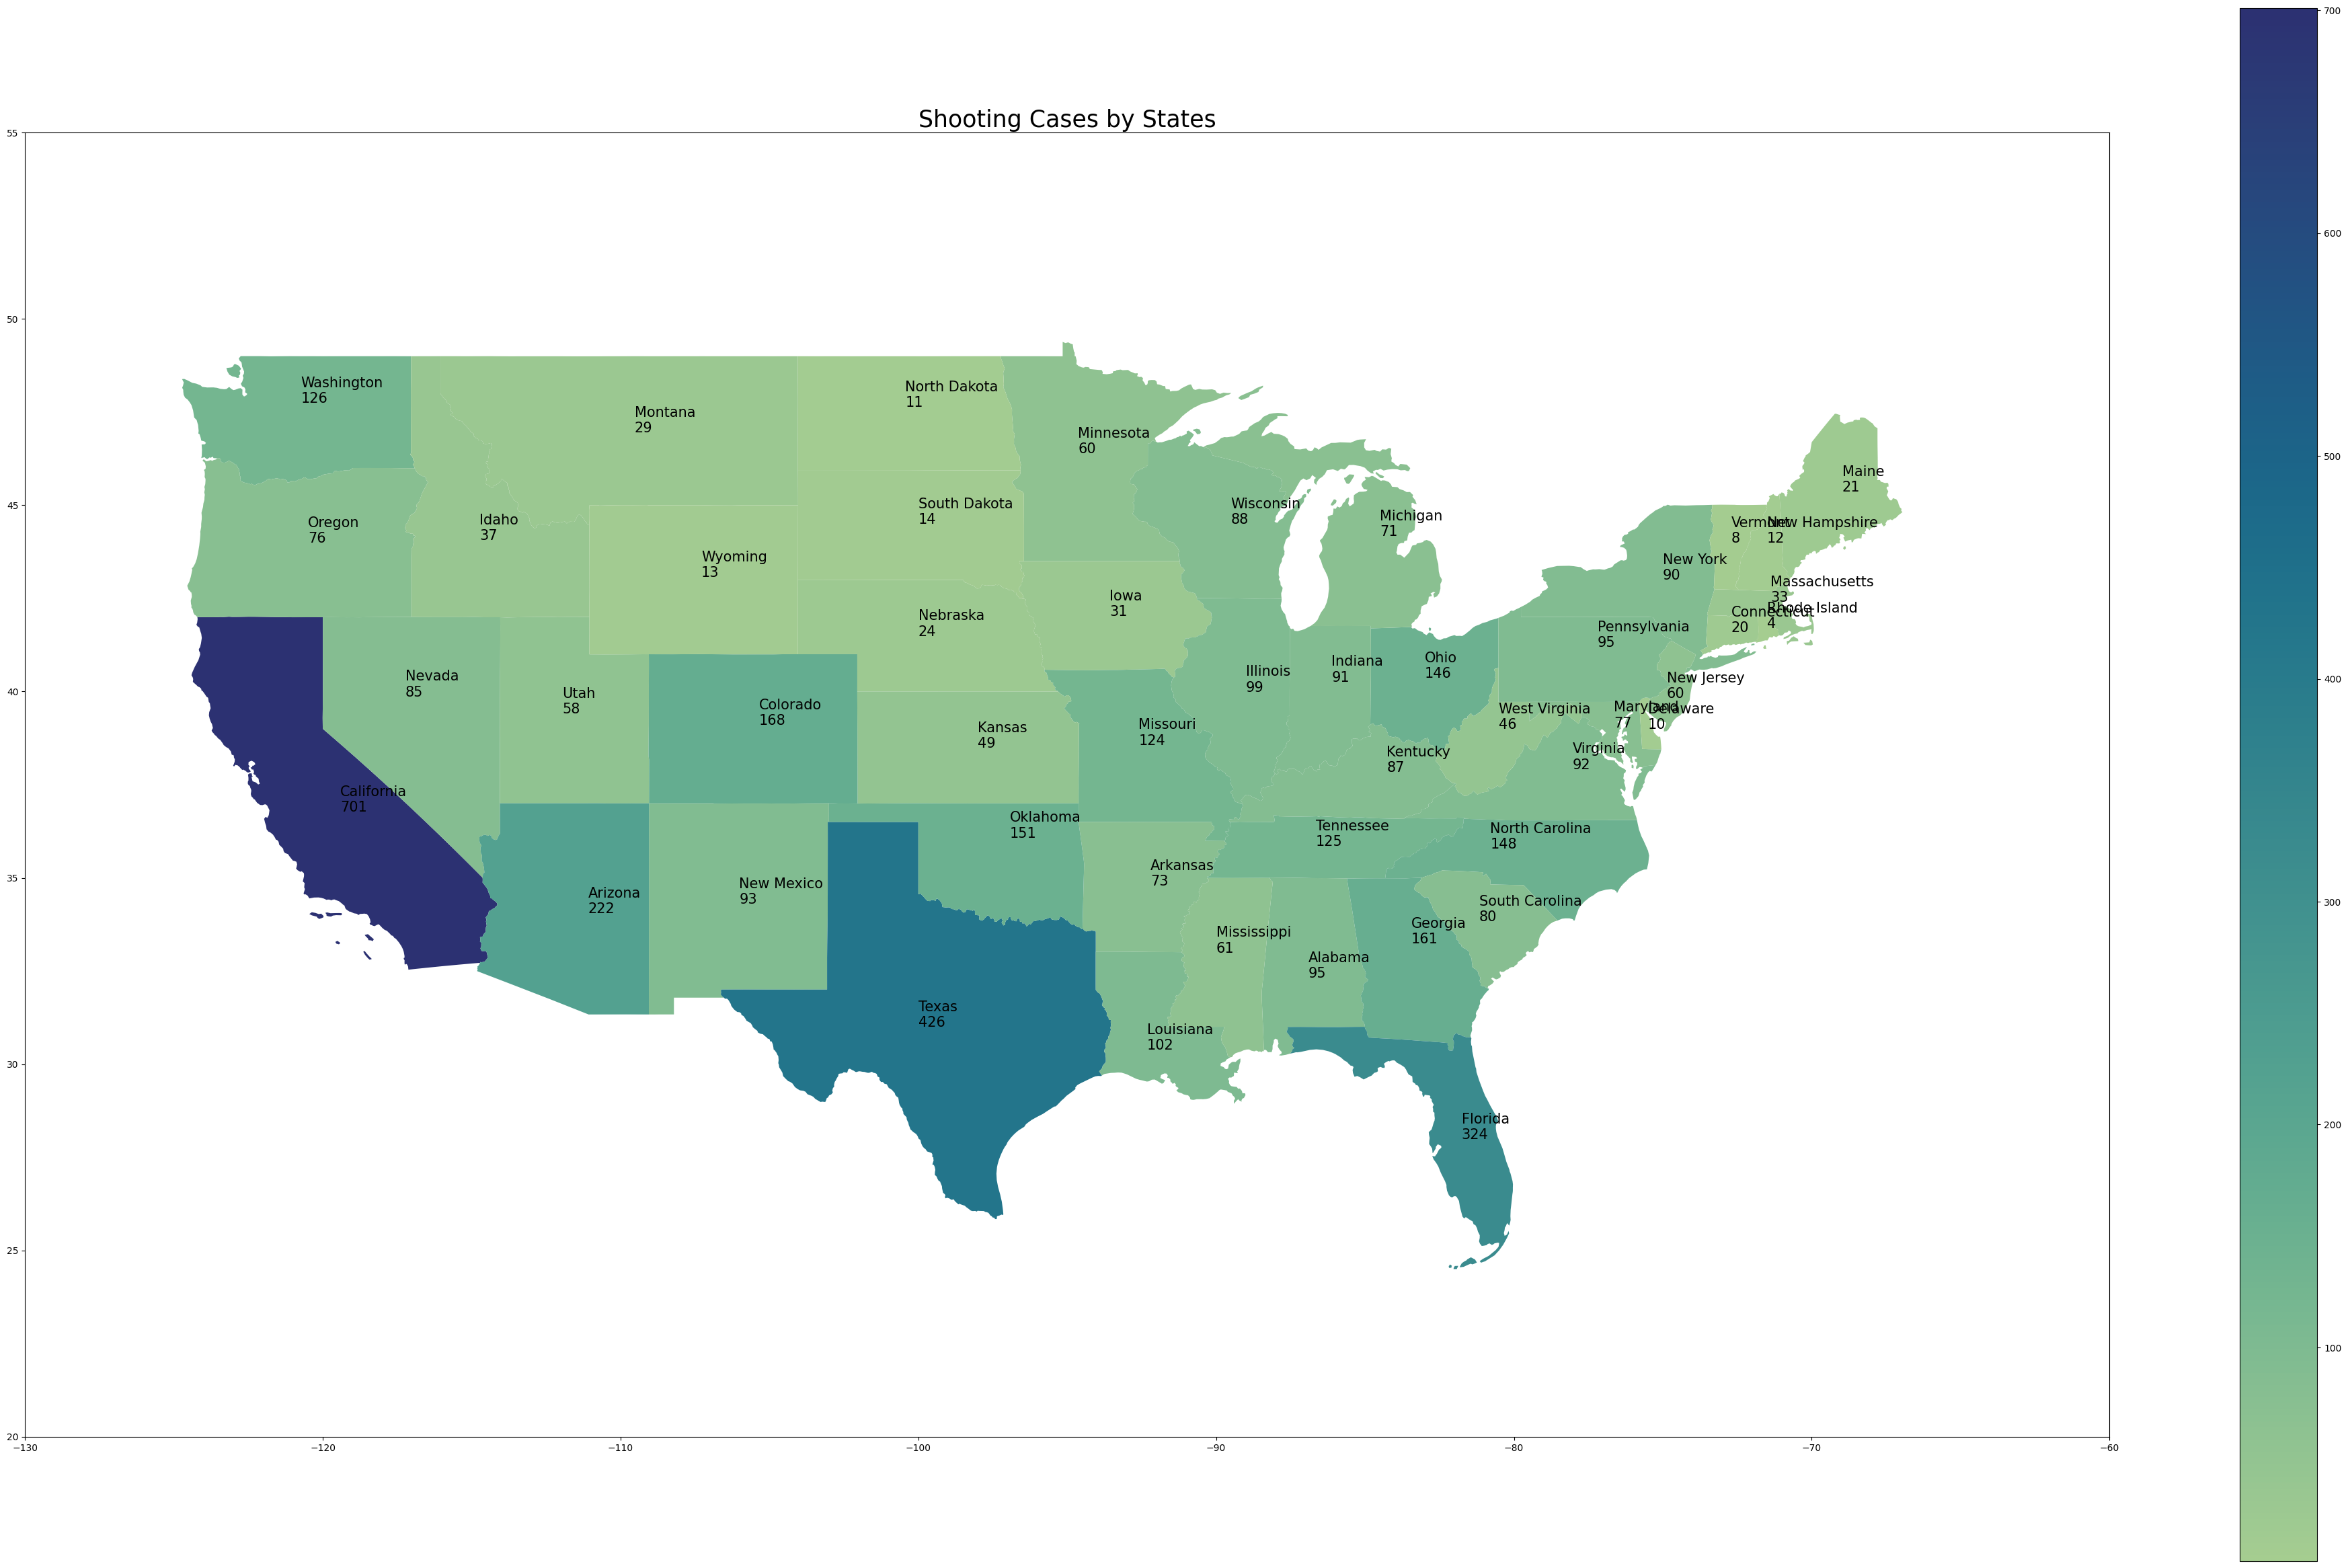

In [ ]:
# plot USA map
geo_merge.plot(column='shooting_cases',figsize=(50, 30),legend=True, cmap="crest")
plt.xlim(-130,-60)
plt.ylim(20,55)
# add countries names and numbers
for i in range(len(geo_merge)):
    plt.text(geo_merge.longitude[i],geo_merge.latitude[i],"{}\n{}".format(geo_merge.NAME[i],geo_merge.shooting_cases[i]),size=15)
plt.title('Shooting Cases by States',fontsize=25)
plt.show()

### Data Quality Analysis

In [ ]:
data = pd.read_csv("shootings.csv",parse_dates = ["date"]) # We upload the dataset

In [ ]:
data.dtypes # The types of features we have

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
arms_category                      object
dtype: object

In [ ]:
data.info() # Some information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4895 non-null   int64         
 1   name                     4895 non-null   object        
 2   date                     4895 non-null   datetime64[ns]
 3   manner_of_death          4895 non-null   object        
 4   armed                    4895 non-null   object        
 5   age                      4895 non-null   float64       
 6   gender                   4895 non-null   object        
 7   race                     4895 non-null   object        
 8   city                     4895 non-null   object        
 9   state                    4895 non-null   object        
 10  signs_of_mental_illness  4895 non-null   bool          
 11  threat_level             4895 non-null   object        
 12  flee                     4895 non-

In [ ]:
data.drop('id', axis = 1).describe(include = "all")# Some statistics description of our dataset , we remove the Id because it's unique for each individual

<ipython-input-12-55e550f9c9b6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.drop('id', axis = 1).describe(include = "all")# Some statistics description of our dataset , we remove the Id because it's unique for each individual


,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
count,4895,4895,4895,4895,4895.000000,4895,4895,4895,4895,4895,4895,4895,4895,4895
unique,4851,1792,2,89,NaN,2,6,2288,51,2,3,4,2,12
top,TK TK,2018-06-29 00:00:00,shot,gun,NaN,M,White,Los Angeles,CA,False,attack,Not fleeing,False,Guns
freq,29,9,4647,2755,NaN,4673,2476,78,701,3792,3160,3073,4317,2764
first,NaN,2015-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-06-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,36.549750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,12.694348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### First debrief
- We have a dataset of `4895` individuals with `15` features
- Since we work on a unsupervised learning project, all the variables of our dataset have a predictive role
-`1` ratio variable (age)
-`1` interval variable (date)
-`13` nominal variables
- There is apparently no mising values in our dataset. But after a better understanding of our dataset, we notice than some parameters can be considered as missing values.

We summerize in the following dataframe all the first informations gathered.

In [ ]:
# We present each feature, his scale, role and wether he has missing values or not
data_carach = pd.DataFrame(columns = ["Features","Scale", "Role", "Missing Values ratio"])
data_carach["Features"] = data.columns
data_carach.index = data.columns
data_carach.drop('Features', axis = 1, inplace=True)


#Scale
data_carach["Scale"] = "Nominal"
data_carach["Scale"]["date"] = "Interval"
data_carach["Scale"]["age"] = "Ratio"

#Role
data_carach["Role"] = "Predictive"

# Missing values in our our data
total = data.shape[0] # total number of individuals (Categories 'unknown', 'undetermined','other')
data_carach["Missing Values ratio"] = 0
data_carach["Missing Values ratio"]["armed"] = data.armed[data["armed"] == "unknown"].count() /total
data_carach["Missing Values ratio"]["race"] = data.race[data["race"] == "Other"].count() /total
data_carach["Missing Values ratio"]["threat_level"] = (data.threat_level[data["threat_level"] == "undetermined"].count() + data.threat_level[data["threat_level"] == "other"].count()) /total
data_carach["Missing Values ratio"]["flee"] = data.flee[data["flee"] == "Other"].count() /total
data_carach["Missing Values ratio"]["arms_category"] = data.arms_category[data["arms_category"] == "Unknown"].count() /total

data_carach

<ipython-input-31-154965ea9137>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_carach["Missing Values ratio"]["armed"] = data.armed[data["armed"] == "unknown"].count() /total


,Scale,Role,Missing Values ratio
id,Nominal,Predictive,0.000000
name,Nominal,Predictive,0.000000
date,Interval,Predictive,0.000000
manner_of_death,Nominal,Predictive,0.000000
armed,Nominal,Predictive,0.085393
age,Ratio,Predictive,0.000000
gender,Nominal,Predictive,0.000000
race,Nominal,Predictive,0.009806
city,Nominal,Predictive,0.000000
state,Nominal,Predictive,0.000000


 After The first step of our analysis we conclude that :

 - The level of threat feature with 35% of missing values can not be assumed as a relevent feature
 - Since the goal is to determine some pattern among data, the Id feature which is unique per individuals won't be helpful during our analysis

## Descriptive Analysis - Univariate Analysis

<ipython-input-10-570a37600022>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  year = pd.Series([])


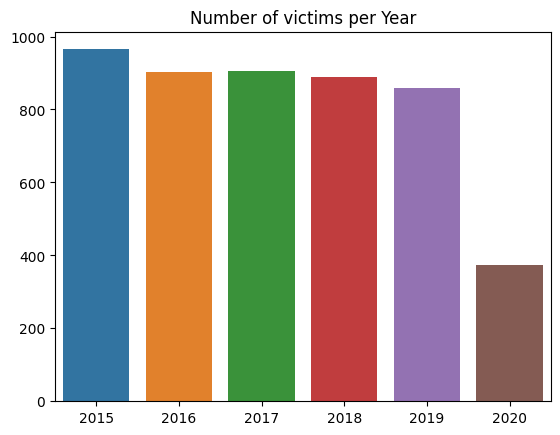

In [ ]:
# We'll show the evolution of the number of victims over time in terms of year
plt.subplots()
year = pd.Series([])
for i in range(data.shape[0]) :
  year[i] = data["date"][i].year


sns.barplot(x = year.value_counts().index, y = year.value_counts().values)
plt.title("Number of victims per Year");

`The proportion in 2020 is due to the lack of information in our dataset. Indeed the dataset contains information from january 2015 to june 2020`

<ipython-input-7-ae9db19e6f44>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  month = pd.Series([])


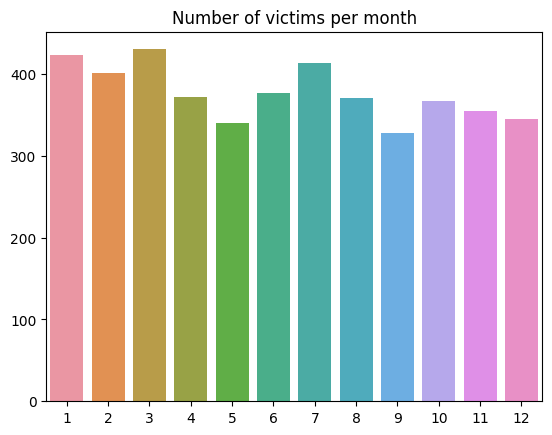

In [ ]:
# show the evolution of the number of victims over time in terms of months
month = pd.Series([])
for i in range(data.shape[0]) :
  if (data["date"][i].year != 2020) :  #Because of the lack of information, we removed the data about year 2020 for this plot
     month[i] = data["date"][i].month

sns.barplot(x = month.value_counts().index, y = month.value_counts().values)

plt.title("Number of victims per month");

In [ ]:
data["count"] = np.ones(len(data))

In [ ]:
data_toHeatmap = pd.DataFrame(data = np.zeros((6,12)),index = [2015,2016,2017,2018,2019,2020],columns=["Jan","Feb","Mar","Avril","May","June","July","Aug","Sep","Oct","Nov","Dec"])

In [ ]:
data_toHeatmap.iloc[0,:] = data[data["date"].dt.year == 2015]["date"].dt.month.value_counts(sort= False).values
data_toHeatmap.iloc[1,:] = data[data["date"].dt.year == 2016]["date"].dt.month.value_counts(sort= False).values
data_toHeatmap.iloc[2,:] = data[data["date"].dt.year == 2017]["date"].dt.month.value_counts(sort= False).values
data_toHeatmap.iloc[3,:] = data[data["date"].dt.year == 2018]["date"].dt.month.value_counts(sort= False).values
data_toHeatmap.iloc[4,:] = data[data["date"].dt.year == 2019]["date"].dt.month.value_counts(sort= False).values
data_toHeatmap.iloc[5,:6] = data[data["date"].dt.year == 2020]["date"].dt.month.value_counts(sort= False).values
#data[data["date"].dt.year == 2015]["date"].dt.month.value_counts(sort= False)

In [ ]:
data_toHeatmap

,Jan,Feb,Mar,Avril,May,June,July,Aug,Sep,Oct,Nov,Dec
2015,75.0,77.0,91.0,83.0,69.0,63.0,100.0,91.0,80.0,78.0,76.0,82.0
2016,80.0,85.0,90.0,73.0,69.0,87.0,71.0,77.0,73.0,71.0,68.0,60.0
2017,91.0,97.0,74.0,65.0,68.0,80.0,91.0,78.0,66.0,81.0,76.0,39.0
2018,96.0,74.0,99.0,88.0,70.0,70.0,82.0,68.0,50.0,64.0,63.0,64.0
2019,81.0,68.0,76.0,63.0,64.0,77.0,69.0,57.0,59.0,73.0,71.0,100.0
2020,82.0,61.0,73.0,58.0,78.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

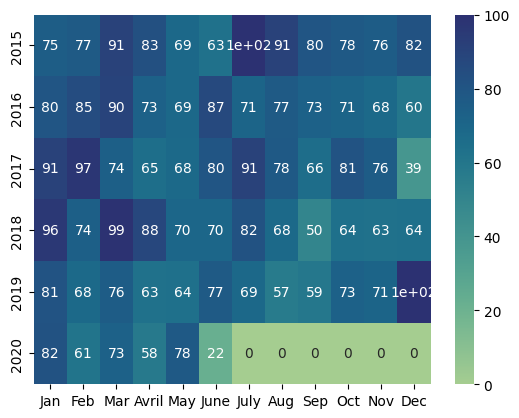

In [ ]:
sns.heatmap(data_toHeatmap,cmap = "crest",annot = True)

In [ ]:
data['arms_category'].value_counts()

Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: arms_category, dtype: int64

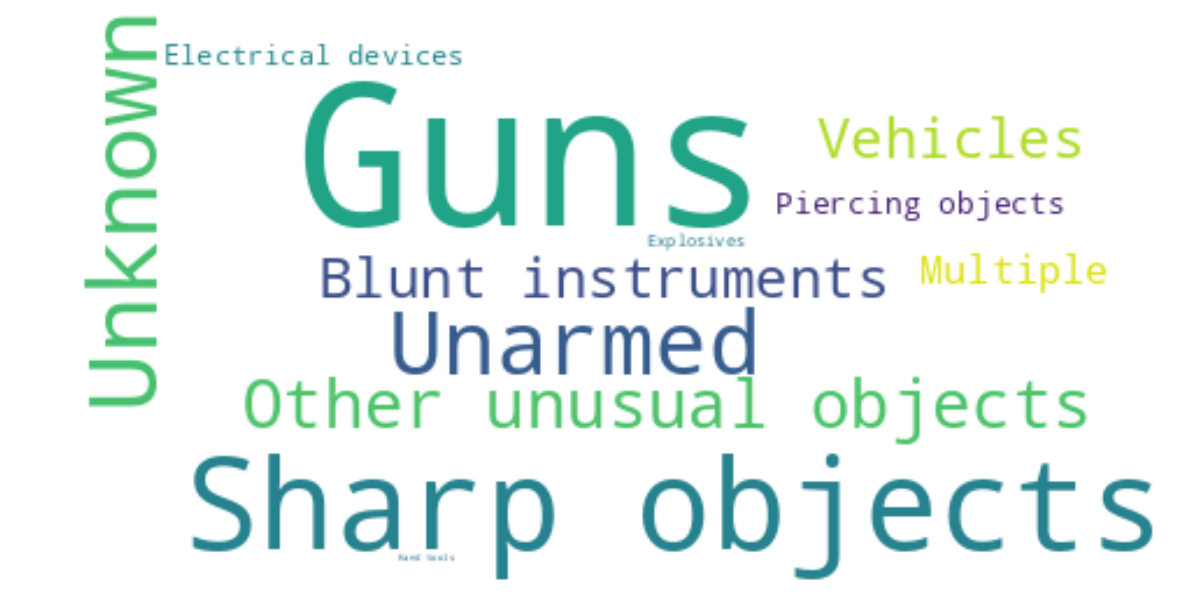

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
wordcloud = WordCloud(background_color = 'white',width = 500,height = 250)

wordcloud.generate_from_frequencies(frequencies = data['arms_category'].value_counts())

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

The average of victim's age is 36 years old

The youngest victim was 6 years old

The oldest victim was 91 years old



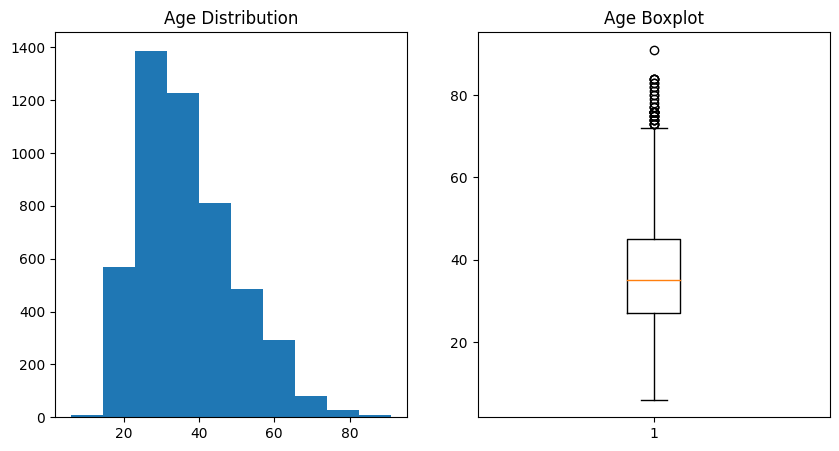

In [ ]:
# We will make an analysis of the age feature
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

#We print some basic information about the age
print("The average of victim's age is {} years old".format(data["age"].mean().astype(int)), end ='\n\n')
print("The youngest victim was {} years old".format(data["age"].min().astype(int)), end ='\n\n')
print("The oldest victim was {} years old".format(data["age"].max().astype(int)), end ='\n\n')


#Let's first see the distribution of the age
ax[0].hist(data["age"])
ax[0].set(title ="Age Distribution")

#Let's see if the feature contains some outliers
age_column = data['age']
ax[1].boxplot(age_column)
ax[1].set(title="Age Boxplot")

plt.show()

In [ ]:
# We determine wether or not the feature city is relevant for our study

#The set of unique cities in our dataset
city = data["city"].unique()
print(f"We have {len(city)} different cities in our dataset")

# We count the occurrence of each city
city_count = data["city"].value_counts()

# The number of cities which contains 50 % of the victims
for i in range(len(city)) :
  if (city_count[:i].sum()/data.shape[0]) > 0.5 :
       print(f"The number of cities which contains 60 % of the victims is {i}")
       break

We have 2288 different cities in our dataset
The number of cities which contains 60 % of the victims is 308


`Because of the number of cities, an anlysis in terms of graph because won't show significant informations`

We have 51 different states in our dataset

The number of states which contained 60 % of the victims is 14



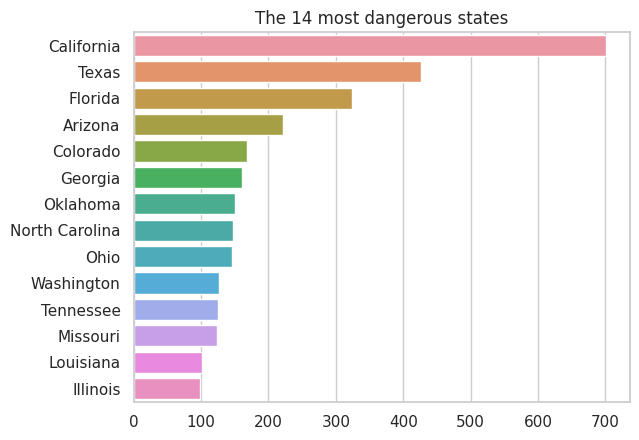

In [ ]:
# We determine wether or not the feature state is relevant for our study
data['state'] = data['state'].map(abbrev_to_name)
#The set of unique cities in our dataset
state = data["state"].unique()
print(f"We have {len(state)} different states in our dataset", end ='\n\n')

# We count the occurrence of each state
state_count = data["state"].value_counts()

# The number of cities which contained 60 % of the victims
for i in range(len(state)) :

  if (state_count[:i].sum()/data.shape[0]) > 0.6 :
       print(f"The number of states which contained 60 % of the victims is {i}", end='\n\n')
       break
# We plot the most dangerous states
sns.barplot(x = data["state"].value_counts()[:14].values , y =data["state"].value_counts()[:14].index, orient = 'h');
plt.title("The 14 most dangerous states");

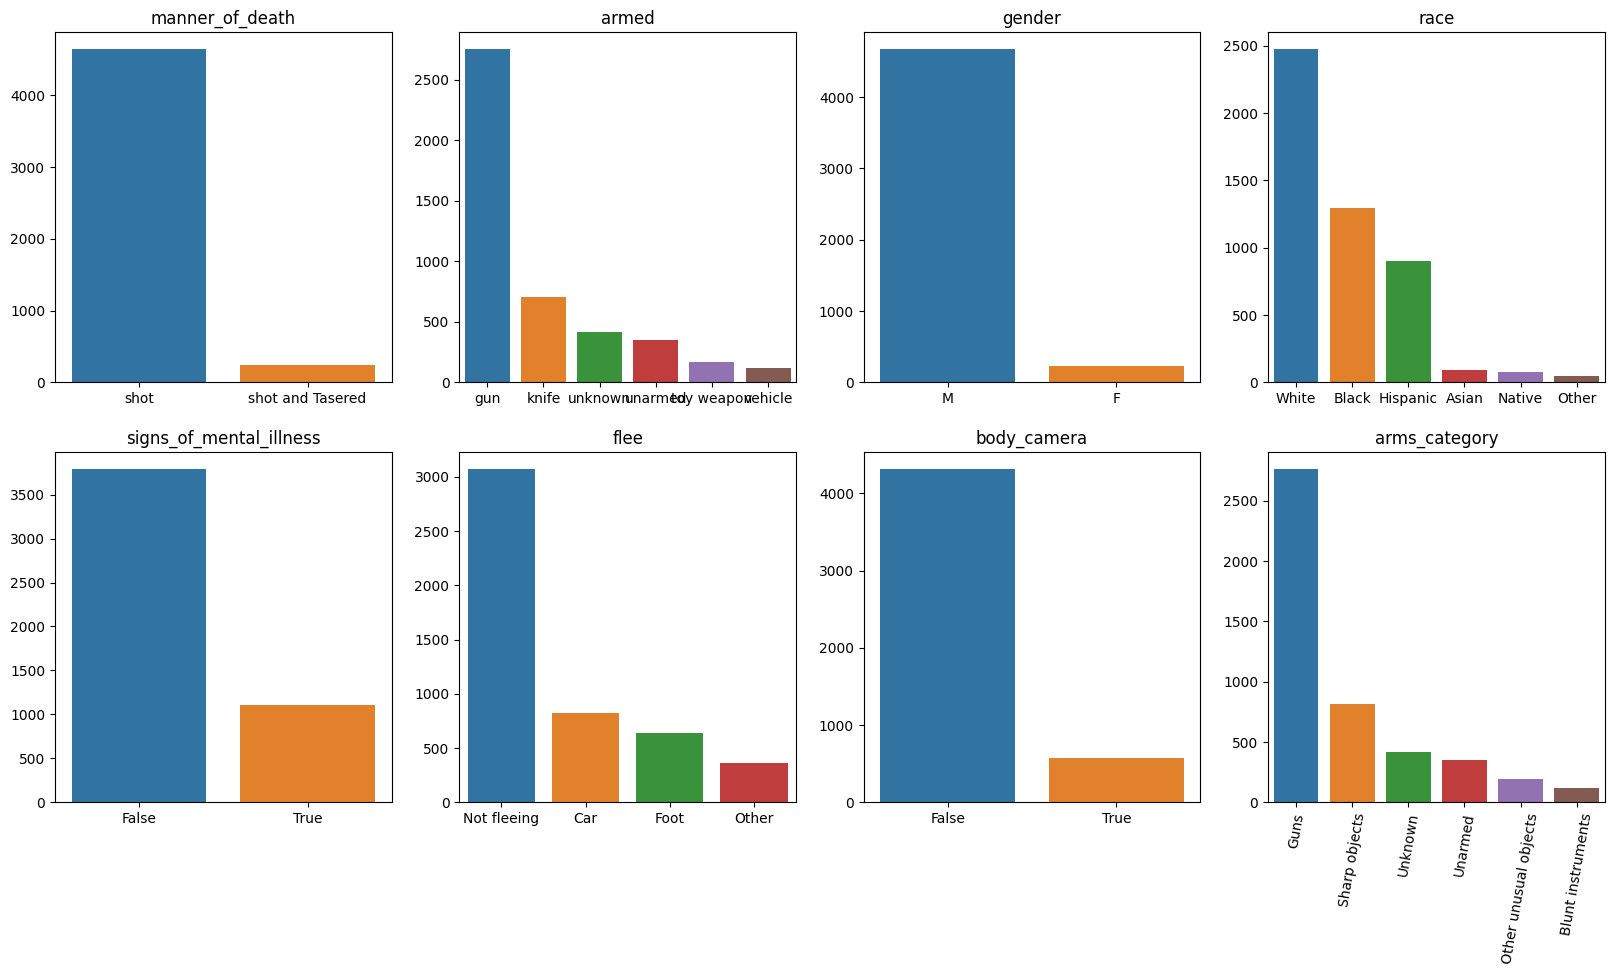

In [ ]:
# Chek the proportion of the categorical variables with less than 100 different categories
fig, ax = plt.subplots(nrows = 2,ncols =4,figsize=(20,10))
ind = 0
for i in range(2):
    for k in range(4):
            col_index = [3,4,6,7,10,12,13,14] #The indexes we want to show

            sns.barplot(x = data[data.columns[col_index[ind]]].value_counts()[:6].index, y = data[data.columns[col_index[ind]]].value_counts()[:6].values, ax=ax[i, k]).set(title = data.columns[col_index[ind]])

            plt.xticks(rotation = 80)
            ind += 1

<ipython-input-14-f23f1781ef9b>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  victims_names = pd.Series([])



The number of names or surnames which contains 90 % of the victims is 154 in a set of 4689 first and last names




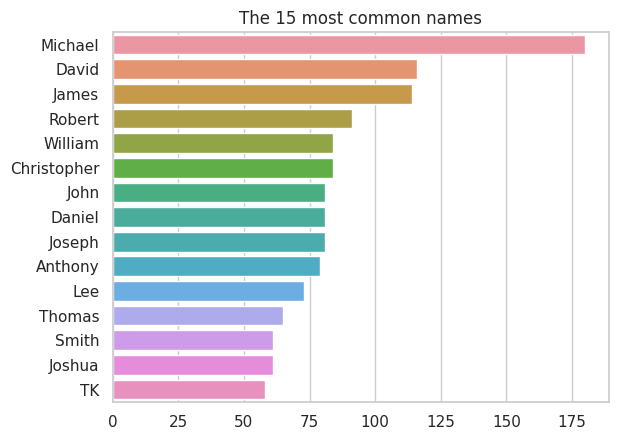

In [ ]:
# We will look at the most common names or surnames amoung the victims

# We split the names and surnames into a list
victims_name = data.name.str.split()

# We collect the names and surnames in a list
ind = 0 #index of our new list
victims_names = pd.Series([])
for i in victims_name:
  for j in i:
    victims_names[ind] = j
    ind +=1

#  The number of names  which contains 50 % of the victims
victims_names_count = victims_names.value_counts()
for i in range(len(victims_names_count)) :
  if (victims_names_count[:i].sum()/data.shape[0]) > 0.9 :
       print(end='\n')
       print(f"The number of names or surnames which contains 90 % of the victims is {i} in a set of {len(victims_names_count)} first and last names", end='\n\n\n')
       break


#Plot of the 15 most common names
sns.barplot(x = victims_names_count[:15].values, y = victims_names_count[:15].index, orient ='h')
plt.title("The 15 most common names");

####ENCODE FROM NOMINAL DATA TO RATIO DATA FOR THE CORRELATION MATRIX

In [ ]:
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_data= pd.DataFrame()
encoded_data['manner_of_death'] = label_encoder.fit_transform(data['manner_of_death'])
encoded_data['gender'] = label_encoder.fit_transform(data['gender'])
encoded_data['race'] = label_encoder.fit_transform(data['race'])
encoded_data['signs_of_mental_illness'] = label_encoder.fit_transform(data['signs_of_mental_illness'])
encoded_data['threat_level'] = label_encoder.fit_transform(data['threat_level'])
encoded_data['flee'] = label_encoder.fit_transform(data['flee'])
encoded_data['body_camera'] = label_encoder.fit_transform(data['body_camera'])
encoded_data['arms_category'] = label_encoder.fit_transform(data['arms_category'])
encoded_data['Age_status'] = label_encoder.fit_transform(data_to_cluster['Age_Status'])

In [ ]:
encoded_data.nunique()

manner_of_death             2
gender                      2
race                        6
signs_of_mental_illness     2
threat_level                3
flee                        4
body_camera                 2
arms_category              12
Age_status                  4
dtype: int64

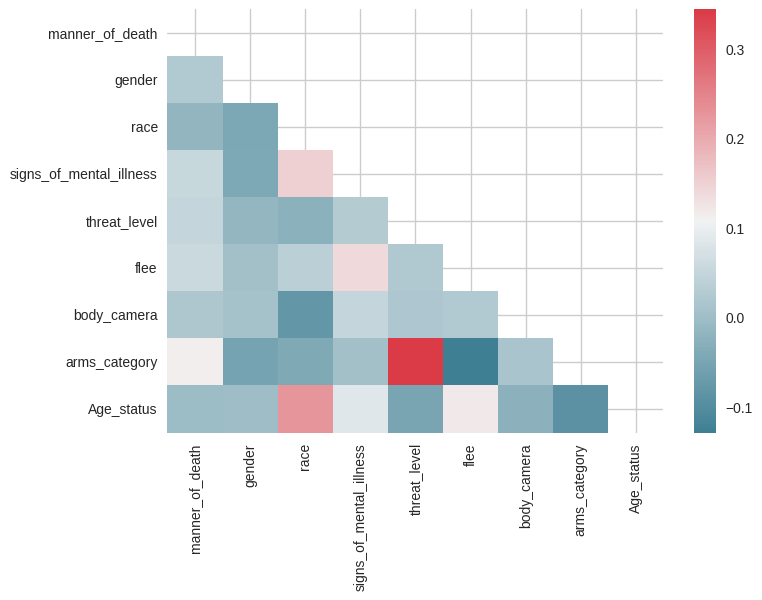

In [ ]:
# We plot the correlation matrix of our dataset
def plot_corr(corr):
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap)

corr = encoded_data.corr()
plot_corr(corr)

## DATA PREPARATION

In [ ]:
data_mca = pd.read_csv("shootings.csv",parse_dates= ["date"])

data_mca.drop("threat_level",axis=1, inplace =True)
#We classify the age and date to transform them in a categorical variable

# Date (We'll only take care of the year)
data_mca["year"] = year.astype(str)

# Age : We'll only take care of the citizen status (minor, major,senior)
data_mca["Age_Status"] = None
for i in range(data_mca.shape[0]) :
  age = data_mca["age"][i]
  if  age < 18 :
    data_mca["Age_Status"][i] = "minor"
  elif  (age > 18) and (age < 67) :
    data_mca["Age_Status"][i] = "major"
  else :
    data_mca["Age_Status"][i] = "senior"

# We transform our boolean features into object
for i  in ["signs_of_mental_illness","body_camera"] :
  data_mca[i][data_mca[i] == True] = i + ' Y'
  data_mca[i][data_mca[i] == False] = i + ' F'



# We remove the features with more than 12 different categories
data_mca.drop(["name","armed","state","age","date","id","city","arms_category"],axis=1, inplace =True)

<ipython-input-38-989a463a9e85>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mca["Age_Status"][i] = "major"
<ipython-input-38-989a463a9e85>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mca["Age_Status"][i] = "senior"
<ipython-input-38-989a463a9e85>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mca["Age_Status"][i] = "minor"
<ipython-input-38-989a463a9e85>:22: SettingWithCopyWarning: 
A value is trying to be

In [ ]:
data_mca.head()

,manner_of_death,gender,race,signs_of_mental_illness,flee,body_camera,year,Age_Status
0,shot,M,Asian,signs_of_mental_illness Y,Not fleeing,body_cameraF,2015,major
1,shot,M,White,signs_of_mental_illnessF,Not fleeing,body_cameraF,2015,major
2,shot and Tasered,M,Hispanic,signs_of_mental_illnessF,Not fleeing,body_cameraF,2015,major
3,shot,M,White,signs_of_mental_illness Y,Not fleeing,body_cameraF,2015,major
4,shot,M,Hispanic,signs_of_mental_illnessF,Not fleeing,body_cameraF,2015,major


## DIMENSION REDUCTION USING MCA (Multiple Correspodence Analysis)


In [ ]:
#Link to package we used to proceed the MCA (https://pypi.org/project/fanalysis/)
!pip install fanalysis
import fanalysis.mca as mca #we import the package


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 1.0 MB/s eta 0:00:00


In [ ]:
X = data_mca.values

# We create our MCA model
my_mca = mca.MCA(n_components= 10, row_labels=data_mca.index.values, var_labels=data_mca.columns.values)


In [ ]:
my_mca.fit(X) #We feat our model with the reduced dataset

MCA(n_components=10,
    row_labels=array([   0,    1,    2, ..., 4892, 4893, 4894]),
    var_labels=array(['manner_of_death', 'gender', 'race', 'signs_of_mental_illness',
       'flee', 'body_camera', 'year', 'Age_Status'], dtype=object))

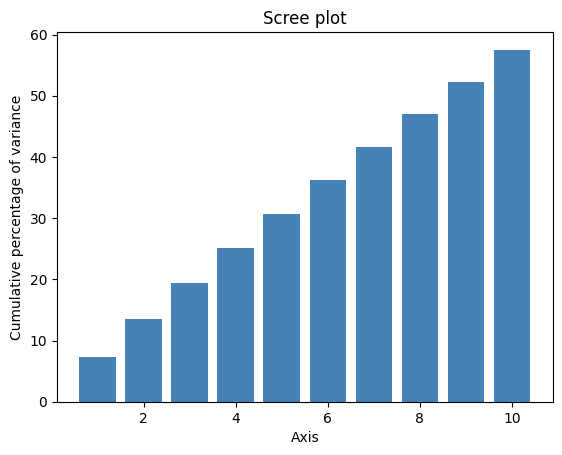

In [ ]:
my_mca.plot_eigenvalues(type = 'cumulative')

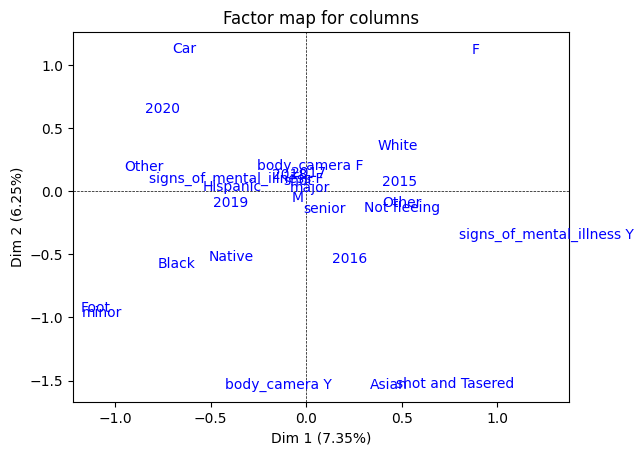

In [ ]:
my_mca.mapping_col(num_x_axis=1,num_y_axis=2)

### CLUSTERING WITH K-MODES


In [ ]:
# K-Modes is the clustering algorithms for categorical data like this case
# Delete the ratio data and interval data for preparing data for clustering
# We want to cluster the victims with data that focuses on the victim's characteristics and actions
# other components like city or state don't really mean much so we deleted it.
# Instead of using arme variable, we decided to use arme_category to reduce the number of types (89 types of armes vs 12 arme category)
data_to_cluster = data.drop(["id", "name", "date","armed","age","city","state"], axis =1 )
# Age : We'll only take care of the citizen status (minor, major,senior)
data_to_cluster["Age_Status"] = None
for i in range(data.shape[0]) :
  age = data["age"][i]
  if  age <= 18 :
    data_to_cluster["Age_Status"][i] = "0 - 18"
  elif  (age > 18) and (age <= 40) :
    data_to_cluster["Age_Status"][i] = "19 - 40"
  elif (age > 40) and (age <= 60):
    data_to_cluster["Age_Status"][i] = "41 - 60"
  else :
    data_to_cluster["Age_Status"][i] = "60+"
data_to_cluster.nunique()

<ipython-input-27-f4eaf3c22fc9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_cluster["Age_Status"][i] = "41 - 60"
<ipython-input-27-f4eaf3c22fc9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_cluster["Age_Status"][i] = "19 - 40"
<ipython-input-27-f4eaf3c22fc9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_cluster["Age_Status"][i] = "0 - 18"
<ipython-input-27-f4eaf3c22fc9>:18: SettingWithCopyWarning:

manner_of_death             2
gender                      2
race                        6
signs_of_mental_illness     2
threat_level                3
flee                        4
body_camera                 2
arms_category              12
Age_Status                  4
dtype: int64

In [ ]:
data_to_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   manner_of_death          4895 non-null   object
 1   gender                   4895 non-null   object
 2   race                     4895 non-null   object
 3   signs_of_mental_illness  4895 non-null   bool  
 4   threat_level             4895 non-null   object
 5   flee                     4895 non-null   object
 6   body_camera              4895 non-null   bool  
 7   arms_category            4895 non-null   object
 8   Age_Status               4895 non-null   object
dtypes: bool(2), object(7)
memory usage: 277.4+ KB


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 12048.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 12048.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 12048.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 12048.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 12048.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 12048.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 12048.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration:

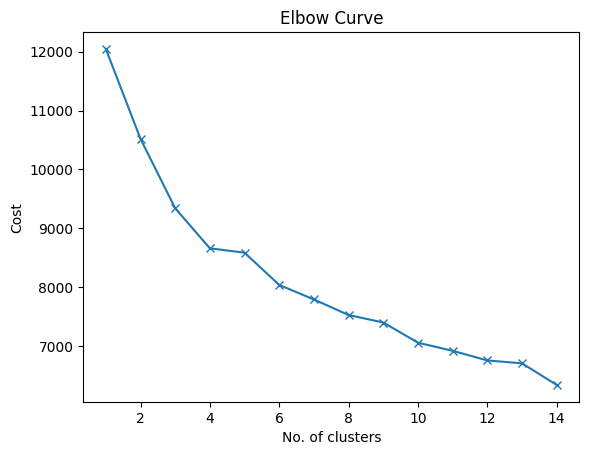

In [ ]:
# Elbow curve to find optimal K
# Here we run K from 1 to 15 to see how many clusters will be best optimal
cost = []
K = range(1,15)
for k in list(K):
    kmode = KModes(n_clusters=k, init = "random", n_init = 10, verbose=1)
    kmode.fit_predict(data_to_cluster)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

From the graph above, we decide to choose 6 clusters

In [ ]:
# Building the model with 6 clusters
kmode = KModes(n_clusters=6, init = "random", n_init = 10, verbose=1)
clusters = kmode.fit_predict(data_to_cluster)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 537, cost: 8430.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1513, cost: 8811.0
Run 2, iteration: 2/100, moves: 137, cost: 8811.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 881, cost: 8265.0
Run 3, iteration: 2/100, moves: 211, cost: 8265.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1216, cost: 8833.0
Run 4, iteration: 2/100, moves: 215, cost: 8833.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1183, cost: 8488.0
Run 5, iteration: 2/100, moves: 1271, cost: 8067.0
Run 5, iteration: 3/100, moves: 568, cost: 8067.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration

array([4, 4, 0, ..., 2, 3, 5], dtype=uint16)

In [ ]:
for cluster in range(6):
    mode = kmode.cluster_centroids_[cluster]
    print(f"Cluster {cluster}: {mode}")

Cluster 0: ['shot' 'M' 'White' 'False' 'other' 'Not fleeing' 'False' 'Sharp objects'
 '41 - 60']
Cluster 1: ['shot' 'M' 'White' 'False' 'attack' 'Not fleeing' 'False' 'Guns'
 '19 - 40']
Cluster 2: ['shot' 'M' 'White' 'True' 'attack' 'Not fleeing' 'False' 'Guns' '19 - 40']
Cluster 3: ['shot' 'M' 'Hispanic' 'False' 'attack' 'Not fleeing' 'False' 'Guns'
 '19 - 40']
Cluster 4: ['shot' 'M' 'White' 'False' 'attack' 'Not fleeing' 'False' 'Guns'
 '41 - 60']
Cluster 5: ['shot' 'M' 'White' 'False' 'attack' 'Not fleeing' 'False' 'Unknown'
 '19 - 40']


We can interpret it as follows
We devided the victims into 6 cluster with the following characteristics:
- Victims in cluster number 0 will have some features similar to the following:
the victim was killed by "**shot**", and this is the "**Man**", he is "**Black**", he "**doesn't have signs of mental illness**", he tried to "**attack**" the police, he "**didn't flee**". In this cases, the police "**didn't turn on the camera**", and the victims armed with "**Guns**". His age is in range of "**19-40**"
- ...


In [ ]:
from collections import Counter
cluster_counts = Counter(clusters)

# Print the counts for each cluster
for cluster_num, count in cluster_counts.items():
    print(f'Cluster {cluster_num}: {count} data points')

Cluster 4: 776 data points
Cluster 0: 940 data points
Cluster 2: 752 data points
Cluster 3: 884 data points
Cluster 1: 1241 data points
Cluster 5: 302 data points


###CLUSTERING WITH K-MEANS


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

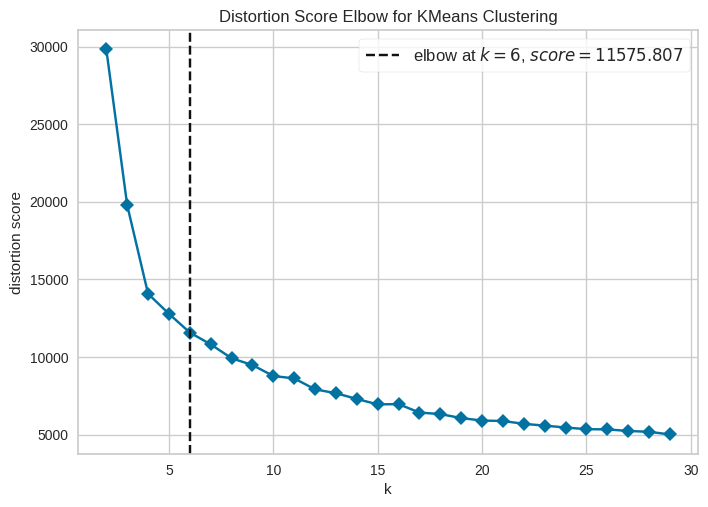

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Import ElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= False)
visualizer.fit(encoded_data)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [ ]:
kmeans = KMeans(n_clusters=6,n_init=1, init="random").fit(encoded_data)
centers=kmeans.cluster_centers_
print(centers.round())
centers= centers.round().astype(str)
# We also represent the data in 2D-space with colors corresponding to cluster
kmeans.labels_

[[0. 1. 5. 0. 0. 2. 0. 3. 2.]
 [0. 1. 1. 0. 0. 2. 0. 3. 1.]
 [0. 1. 1. 0. 0. 1. 0. 3. 1.]
 [0. 1. 3. 0. 1. 2. 0. 9. 1.]
 [0. 1. 5. 0. 0. 2. 0. 3. 1.]
 [0. 1. 5. 0. 0. 0. 0. 3. 1.]]


array([1, 0, 3, ..., 3, 4, 5], dtype=int32)

In [ ]:
for cluster in range(6):
    mode = centers[cluster]
    match mode[0]:
      case "0.0": mode[0] = 'shot'
    match mode [1]:
      case "1.0": mode[1] = "M"
    match mode[2]:
      case "3.0": mode[2] = "Native"
      case "1.0": mode[2] = "Black"
      case "5.0": mode[2] = "White"
    match mode[3]:
      case "0.0": mode[3] = "False"
      case "1.0": mode[3] = "True"
    match mode[4]:
      case "0.0": mode[4] = "attack"
      case "1.0": mode[4] = "other"
    match mode[5]:
      case "0.0": mode[5] = "Car"
      case "1.0": mode[5] = "Foot"
      case "2.0": mode[5] = "Not fleeing"
    match mode[6]:
      case "0.0": mode[6] = "False"
    match mode[7]:
      case "3.0": mode[7] = "Guns"
      case "6.0": mode[7] = "Piercing objects"
      case "8.0": mode[7] = "Unarmed"
      case "9.0": mode[7] = "Unknown"
      case "10.0": mode[7] = "Vehicles"
    match mode[8]:
      case "1.0": mode[8] = "19-40"
      case "2.0": mode[8] = "41-60"
    print(f"Cluster {cluster}: {mode}")

Cluster 0: ['shot' 'M' 'White' 'False' 'other' 'Not fleeing' 'False' 'Unknown'
 '19-40']
Cluster 1: ['shot' 'M' 'White' 'False' 'attack' 'Car' 'False' 'Guns' '19-40']
Cluster 2: ['shot' 'M' 'Black' 'False' 'attack' 'Not fleeing' 'False' 'Guns' '19-40']
Cluster 3: ['shot' 'M' 'White' 'False' 'attack' 'Not fleeing' 'False' 'Guns' '41-60']
Cluster 4: ['shot' 'M' 'White' 'False' 'attack' 'Not fleeing' 'False' 'Guns' '19-40']
Cluster 5: ['shot' 'M' 'Black' 'False' 'other' 'Not fleeing' 'False' 'Unknown'
 '19-40']


In [ ]:
for cluster in range(6):
    mode = kmode.cluster_centroids_[cluster]
    print(f"Cluster {cluster}: {mode}")

Cluster 0: ['shot' 'M' 'Black' 'False' 'attack' 'Not fleeing' 'False' 'Guns'
 '19 - 40']
Cluster 1: ['shot' 'M' 'White' 'False' 'attack' 'Car' 'False' 'Guns' '19 - 40']
Cluster 2: ['shot' 'M' 'White' 'False' 'attack' 'Not fleeing' 'False' 'Guns'
 '19 - 40']
Cluster 3: ['shot' 'M' 'Black' 'False' 'other' 'Car' 'False' 'Unarmed' '19 - 40']
Cluster 4: ['shot' 'M' 'White' 'True' 'attack' 'Not fleeing' 'False' 'Guns' '19 - 40']
Cluster 5: ['shot' 'M' 'White' 'False' 'other' 'Not fleeing' 'False' 'Sharp objects'
 '41 - 60']


In [ ]:
cluster_counts = np.bincount(kmeans.labels_)

# Print the counts for each cluster
for cluster_num, count in enumerate(cluster_counts):
    print(f'Cluster {cluster_num}: {count} data points')

Cluster 0: 709 data points
Cluster 1: 987 data points
Cluster 2: 486 data points
Cluster 3: 1738 data points
Cluster 4: 717 data points
Cluster 5: 258 data points
